# Feel the Randomness

In [83]:
import scipy         # Another numerical library
from scipy import integrate

import matplotlib    # Library used for plotting
import numpy as np   # Numerical library
import matplotlib.pyplot as plt # Plot commands

# Define some colors using the RGB format

CF_red = (204/255, 121/255, 167/255)
CF_vermillion = (213/255, 94/255, 0)
CF_orange = (230/255, 159/255, 0)
CF_yellow = (240/255, 228/255, 66/255)
CF_green = (0, 158/255, 115/255)
CF_sky = (86/255, 180/255, 233/255)
CF_blue = (0, 114/255, 178/255)
CF_black = (0, 0, 0)

## Radioactive Decay

A common stochastic process is the radioactive decay. Most commonly, it is modeled as an exponential function

$$
N(t) = N_0 e^{-t/\tau}
$$

where $N(t)$ is the number of atoms at time $t$, $N_0$ is the number of atoms at $t = 0$, and $\tau$ is the **decay rate**. The smooth exponentially decaying function applies to a large collection of atoms and is clearly not valid for individual ones. After all, an atom is either decayed or not and $N(t) = 1 \times e^{-t/\tau}$ makes no sense.

To understand how the exponential behavior arises from the discrete nature of atoms, let us build the problem from the bottom up. We will start with a collection of atoms and then check them every second. We notice that, on average, an atom has some probability to decay within that second.

1. The easiest way to differentiate decayed and undecayed states is to denote the former ones by 0 and the latter ones by 1. Write a function `decay(state)` that takes in the atomic state (decayed/undecayed). If the atom is decayed, leave it alone; if not, let it decay with probability $p$.

2. Start with $N_0$ atoms at $t = 0$  (create an array of ones of length $N_0$). Run the decay function on each of them $t_{\text{max}}$ times and plot the number of undecayed atoms at each time step.

3. How does the shape of the curve change with $N_0$, $t$, and $p$?

The `decay` function takes in the state and the probability of decay. If the atom is undecayed and the random roll is less than the probability, it gets decayed. In other cases, the atom remains in the same state.

In [84]:
# Decay function
def decay(state, p):
    if state == 1 and np.random.random() < p:
        return 0
    else:
        return state

Here, I test the decay function by graphing it with $1000$ atoms, for $30$ time steps and with a decay probability of $0.25$. As expected. the graph look like an exponential decay.

[Text(0.5, 0, 'Time'),
 Text(0, 0.5, 'Number of undecayed atoms'),
 Text(0.5, 1.0, 'Radioactive decay')]

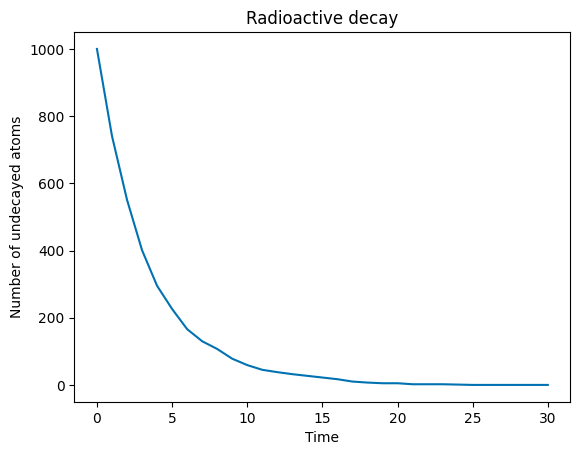

In [85]:
# Radioactive decay graph
N_0 = 1000
t_max = 30
p = 0.25

atoms = np.ones(N_0)
undecayed = np.zeros(t_max + 1)
undecayed[0] = N_0

for i in range(0, t_max):
    atoms = list(map(lambda a: decay(a, p), atoms))
    undecayed[i + 1] = sum(atoms)

fig, ax = plt.subplots(1, 1)
ax.plot(undecayed, color = CF_blue)
ax.set(xlabel="Time", ylabel="Number of undecayed atoms", title="Radioactive decay")

Here, I repeat the process for different initial numbers of atoms ($100, 1000, 10000, 100000$). The graph follows the same shape but when the initial number of atoms is larger, the curve starts steeper as there are more atoms that decay.

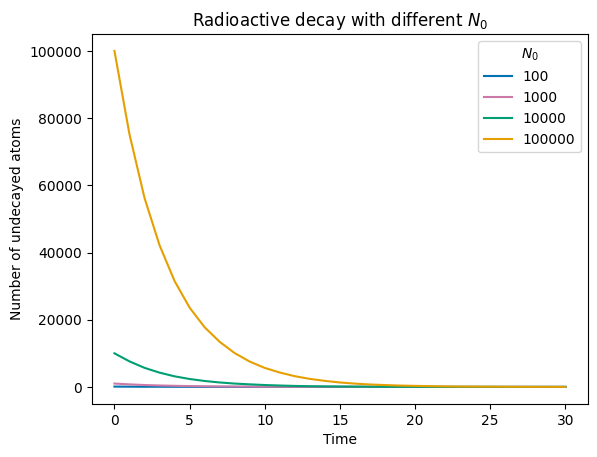

In [86]:
# Radioactive decay with different N_0
N_0s = [100, 1000, 10000, 100000]
t_max = 30
p = 0.25

fig, ax = plt.subplots(1, 1)
cols = [CF_blue, CF_red, CF_green, CF_orange]

for N, col in zip(N_0s, cols):
    atoms = np.ones(N)
    undecayed = np.zeros(t_max + 1)
    undecayed[0] = N

    for i in range(0, t_max):
        atoms = list(map(lambda a: decay(a, p), atoms))
        undecayed[i + 1] = sum(atoms)

    ax.plot(undecayed, color = col, label = f"{N}")

ax.set(xlabel="Time", ylabel="Number of undecayed atoms", title="Radioactive decay with different $N_0$")
ax.legend(title = "$N_0$")

Here, I repeat the process for different maximum time steps ($20, 30, 40, 50$). The graph follows the exact same shape but when the maximum time steps is smaller, the curve gets cut off at that point.

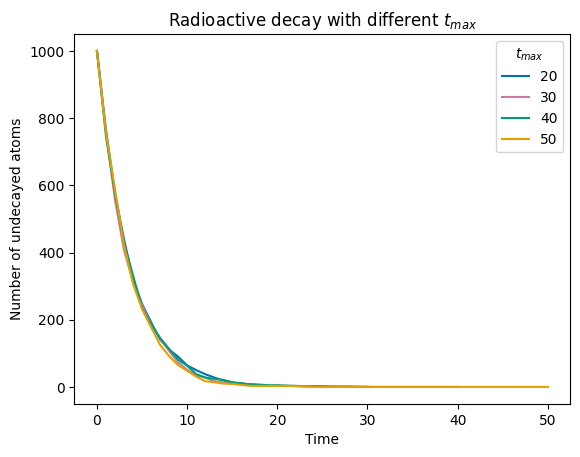

In [87]:
# Radioactive decay with different t_max
N_0 = 1000
t_maxs = [20, 30, 40, 50]
p = 0.25

fig, ax = plt.subplots(1, 1)
cols = [CF_blue, CF_red, CF_green, CF_orange]

for t_max, col in zip(t_maxs, cols):
    atoms = np.ones(N_0)
    undecayed = np.zeros(t_max + 1)
    undecayed[0] = N_0

    for i in range(0, t_max):
        atoms = list(map(lambda a: decay(a, p), atoms))
        undecayed[i + 1] = sum(atoms)

    ax.plot(undecayed, color = col, label = f"{t_max}")

ax.set(xlabel="Time", ylabel="Number of undecayed atoms", title="Radioactive decay with different $t_{max}$")
ax.legend(title = "$t_{max}$")

Here, I repeat the process for different decay probabilities ($0.1, 0.4, 0.7, 0.9$). The graph follows the same shape but when there is a higher probability to decay, the curve is steeper as there are more atoms that decay.

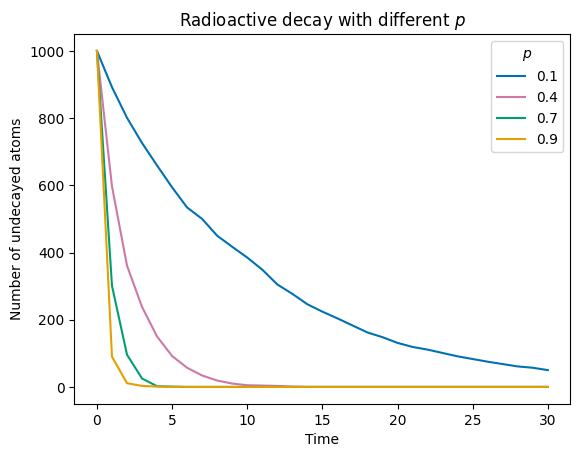

In [88]:
# Radioactive decay with different probablity
N_0 = 1000
t_max = 30
ps = [0.1, 0.4, 0.7, 0.9]

fig, ax = plt.subplots(1, 1)
cols = [CF_blue, CF_red, CF_green, CF_orange]

for p, col in zip(ps, cols):
    atoms = np.ones(N_0)
    undecayed = np.zeros(t_max + 1)
    undecayed[0] = N_0

    for i in range(0, t_max):
        atoms = list(map(lambda a: decay(a, p), atoms))
        undecayed[i + 1] = sum(atoms)

    ax.plot(undecayed, color = col, label = f"{p}")

ax.set(xlabel="Time", ylabel="Number of undecayed atoms", title="Radioactive decay with different $p$")
ax.legend(title = "$p$")